# Tabajo de Machine Learning 1 y 2

La informacion Utilizada en el trabajo es del ministerio, se adjunta link donde se pueden obtener diversas bases de datos con respecto a la pandemia y otros.

URL: https://www.minciencia.gob.cl/covid19/

## Primera Metodologia - Clustering - K-means

Como primera opcion aplicaremos la metodoliga de clustering con K-means para ver que agrupaciones nos genera.

Instalamos las librerias

In [1]:
#Instalamos las librerias adicional
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 994 kB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 33 kB/s 
     |████████████████████████████████| 6.6 MB 49.1 MB/s 


Importamos las librerias que se necesitan, en el proceso.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib

from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import drive
from sklearn.datasets import make_blobs

%matplotlib inline

Importamos los datos que se enccuentra en la siguiente direccion:
 
 -  URL Github : https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto4/2021-08-20-CasosConfirmados-totalRegional.csv
 -  URL CSV: https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2021-08-20-CasosConfirmados-totalRegional.csv

In [3]:
df_Covid = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2021-08-20-CasosConfirmados-totalRegional.csv',
                       engine = 'python')

Vemos las caracteristicas de los datos

In [4]:
df_Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Region                                   18 non-null     object
 1   Casos totales acumulados                 18 non-null     int64 
 2   Fallecidos totales                       18 non-null     int64 
 3   Casos confirmados recuperados            18 non-null     int64 
 4   Casos confirmados por antigeno           18 non-null     int64 
 5   Casos con sospecha de reinfeccion        18 non-null     int64 
 6   Casos probables acumulados               18 non-null     int64 
 7   Casos activos probables                  18 non-null     int64 
 8   Casos nuevos totales                     18 non-null     int64 
 9   Casos nuevos con sintomas                18 non-null     int64 
 10  Casos nuevos sin sintomas*               18 non-null     int64 


Veremos las primeras filas de los datos para ver como son sus variables

In [5]:
df_Covid.head()

,Region,Casos totales acumulados,Fallecidos totales,Casos confirmados recuperados,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos probables acumulados,Casos activos probables,Casos nuevos totales,Casos nuevos con sintomas,Casos nuevos sin sintomas*,Casos nuevos reportados por laboratorio,Casos nuevos confirmados por antigeno,Casos activos confirmados
0,Arica y Parinacota,26558,518,25933,1144,34,3257,16,9,4,5,0,0,71
1,Tarapacá,40813,799,39827,693,50,9572,109,21,13,6,2,6,159
2,Antofagasta,60344,1223,58963,727,42,6303,26,12,10,1,1,2,92
3,Atacama,26979,344,26546,851,34,1543,16,14,8,5,1,2,83
4,Coquimbo,48173,979,46981,509,28,8237,59,15,13,2,0,1,163


Obtenemos los estaidsticos descriptivos de los datos

In [6]:
df_Covid_variables = df_Covid.iloc[0:17,:]
df_Covid= df_Covid.iloc[0:17,:]
df_Covid_variables = df_Covid_variables.drop(['Region'], axis=1)
df_Covid_variables.describe()

,Casos totales acumulados,Fallecidos totales,Casos confirmados recuperados,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos probables acumulados,Casos activos probables,Casos nuevos totales,Casos nuevos con sintomas,Casos nuevos sin sintomas*,Casos nuevos reportados por laboratorio,Casos nuevos confirmados por antigeno,Casos activos confirmados
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,96025.941176,2150.941176,93443.294118,3802.882353,104.117647,19324.411765,116.176471,44.882353,30.235294,11.941176,2.705882,5.000000,313.176471
std,156236.411779,4374.400294,151009.035271,8341.049948,196.769816,35238.048495,233.439830,85.314772,57.017025,21.137853,7.792342,10.659503,593.358475
min,52.000000,0.000000,52.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29221.000000,518.000000,28650.000000,693.000000,34.000000,3257.000000,22.000000,12.000000,5.000000,4.000000,0.000000,1.000000,83.000000
50%,49037.000000,979.000000,48216.000000,1066.000000,50.000000,9572.000000,47.000000,18.000000,13.000000,7.000000,0.000000,2.000000,159.000000
75%,97541.000000,1514.000000,95821.000000,2518.000000,76.000000,14083.000000,68.000000,40.000000,30.000000,10.000000,1.000000,5.000000,183.000000
max,681400.000000,18782.000000,658828.000000,35167.000000,853.000000,147689.000000,993.000000,367.000000,244.000000,91.000000,32.000000,45.000000,2548.000000


Normalizamos los valores por que hay mucha diferencia en el promedio.

Es decir realizamos una conversion, para que se encuentren dentro del mismo rango. 

Restamos a cada celda el valor minimo que se encuentra en su columna  (df_Covid_variables-df_Covid_variables.min()) y lo dividimos por la resta entre el maximo y el minimo que haya en cada columna. de esta manera cada columna tendra un valor maximo 1 y un valor minimo 0

In [7]:
df_Covid_norm = (df_Covid_variables-df_Covid_variables.min())/(df_Covid_variables.max()-df_Covid_variables.min())
df_Covid_norm.describe()

,Casos totales acumulados,Fallecidos totales,Casos confirmados recuperados,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos probables acumulados,Casos activos probables,Casos nuevos totales,Casos nuevos con sintomas,Casos nuevos sin sintomas*,Casos nuevos reportados por laboratorio,Casos nuevos confirmados por antigeno,Casos activos confirmados
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.140859,0.114521,0.141765,0.108138,0.122061,0.130839,0.116995,0.122295,0.123915,0.131222,0.084559,0.111111,0.122911
std,0.229305,0.232904,0.229227,0.237184,0.230680,0.238598,0.235085,0.232465,0.233676,0.232284,0.243511,0.236878,0.232872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042811,0.027580,0.043411,0.019706,0.039859,0.022046,0.022155,0.032698,0.020492,0.043956,0.000000,0.022222,0.032575
50%,0.071894,0.052124,0.073111,0.030313,0.058617,0.064806,0.047331,0.049046,0.053279,0.076923,0.000000,0.044444,0.062402
75%,0.143083,0.080609,0.145374,0.071601,0.089097,0.095350,0.068479,0.108992,0.122951,0.109890,0.031250,0.111111,0.071821
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Búsqueda de la cantidad óptima de clusters

Calculando qué tan similares son los individuos dentro de los clusters

In [8]:
#Suma de los cuadrados wcss
#lista vacia
wcss = []

for i in range(1,11):
  #Genera un modelo Kmeans que va cambiando segun el valor de i, en donde para cada i realiza 3000 iteraciones
  kmeans = KMeans(n_clusters= i , max_iter = 300)
  #aplicamos Kmeans
  kmeans.fit(df_Covid_norm) 
  #Obtenemos la suma de los cuadrados de WCSS con "inertia_" y lo agregamos
  wcss.append(kmeans.inertia_)

Graficamos los resultados dw WCSS para formar el Codo de Jambú

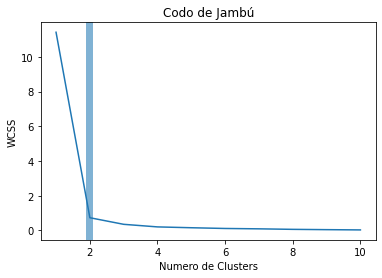

In [9]:
# range (1,11) sera el eje x en donde tomara los valores del 1 al 10
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambú")
plt.xlabel("Numero de Clusters")
plt.axvspan(1.9,2.1, alpha = 6000)
plt.ylabel("WCSS") #WCSS es un indicador de que tan similares son los individuos dentro de los clusters
plt.show()

Aplicando el metodo de K-means a la base de datos

In [10]:
#Creamos el modelo y lo guardamos en clustering
clustering = KMeans(n_clusters= 2, max_iter= 300)
#aplicamos el modelo a la base de datos
clustering.fit(df_Covid_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Ahora agregamos la clasificacion al archivo original

In [11]:
# Los resultado del clustering se guardan en labels_ dentro del modelo
df_Covid['Kmeans_Clustering'] = clustering.labels_
df_Covid.head()

,Region,Casos totales acumulados,Fallecidos totales,Casos confirmados recuperados,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos probables acumulados,Casos activos probables,Casos nuevos totales,Casos nuevos con sintomas,Casos nuevos sin sintomas*,Casos nuevos reportados por laboratorio,Casos nuevos confirmados por antigeno,Casos activos confirmados,Kmeans_Clustering
0,Arica y Parinacota,26558,518,25933,1144,34,3257,16,9,4,5,0,0,71,1
1,Tarapacá,40813,799,39827,693,50,9572,109,21,13,6,2,6,159,1
2,Antofagasta,60344,1223,58963,727,42,6303,26,12,10,1,1,2,92,1
3,Atacama,26979,344,26546,851,34,1543,16,14,8,5,1,2,83,1
4,Coquimbo,48173,979,46981,509,28,8237,59,15,13,2,0,1,163,1


Vizualizando los clusters que se formaron

Aplicaremos el analisis de componentes principales para darnos una idea de como se formaron los clustering ( PCA reduce la cantidad de variables analizar)

Para crear un grafico de dos dimensiones

In [12]:
#Aqui indicamos cuantos componentes principales queremos, por lo tanto si queremos un grafico de dos dimensiones, colocamos 2
pca = PCA(n_components = 2)
#Aqui obtenemos los dos componentes principales
pca_Covid = pca.fit_transform(df_Covid_norm)
#Convertimos los datos en dataframe
pca_Covid_df = pd.DataFrame(data = pca_Covid, columns = ['Componente_1','Componente_2'])
# a este dataframe le agregamos la columna Kmeans_Clustering, por lo tanto agregamos la columna con la funcion pd.concat
pca_nombres_Covid = pd.concat([pca_Covid_df, df_Covid[['Kmeans_Clustering']]], axis=1 )
pca_nombres_Covid

,Componente_1,Componente_2,Kmeans_Clustering
0,-0.341476,-0.001484,1
1,-0.199371,-0.000135,1
2,-0.275339,-0.001863,1
3,-0.318312,-0.017742,1
4,-0.280614,0.018332,1
5,0.200623,0.213102,1
6,3.169979,-0.019036,0
7,-0.141645,-0.035600,1
8,0.010816,-0.201509,1
9,-0.291655,0.021578,1


Graficamos los resultados

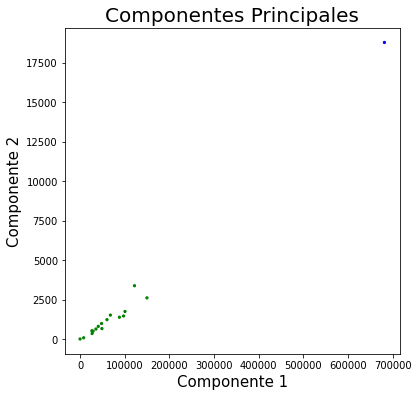

In [13]:
#Agregamos valores
df_Covid_norm['k'] = clustering.labels_

# le damos el tamaño a la figura
fig = plt.figure(figsize=(6,6))
#indicamos que solo agregaremos un grafico dentro de la figura
ax = fig.add_subplot(1,1,1)
#nombres de los ejes y titulo
ax.set_xlabel('Componente 1' , fontsize =15)
ax.set_ylabel('Componente 2' , fontsize =15)
ax.set_title('Componentes Principales', fontsize = 20)
#Creamos un arreglo que contiene los colores
color_theme = np.array(["blue","green","orange","red","yellow"])
ax.scatter(x= df_Covid['Casos totales acumulados'], y = df_Covid['Fallecidos totales'],
           c=color_theme[df_Covid_norm['k']],s=5)
plt.show()

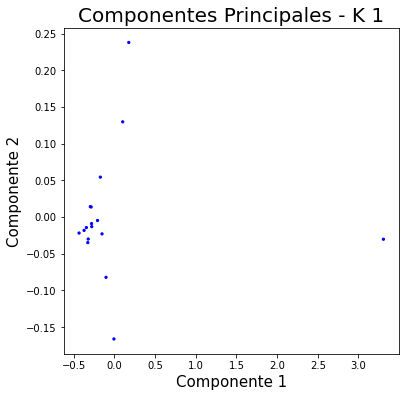

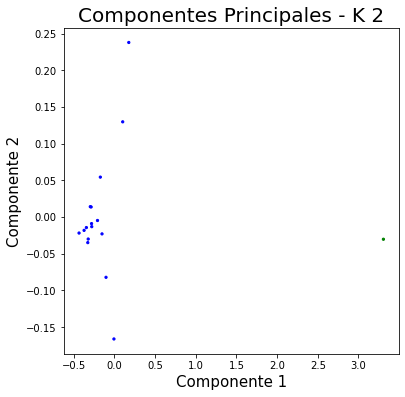

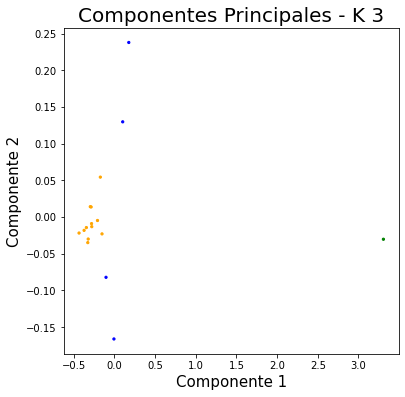

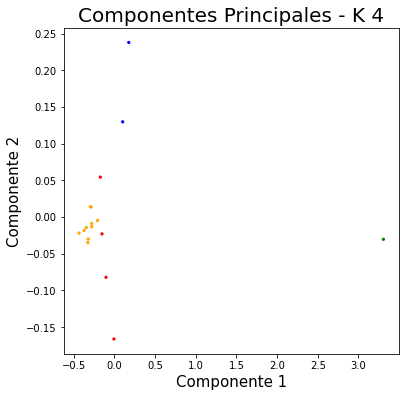

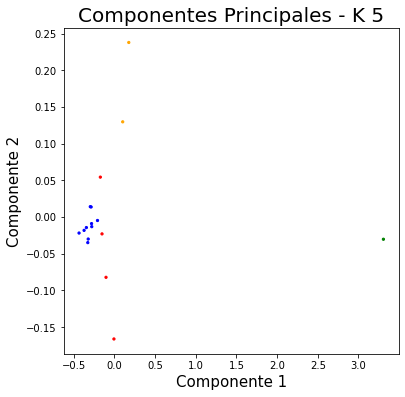

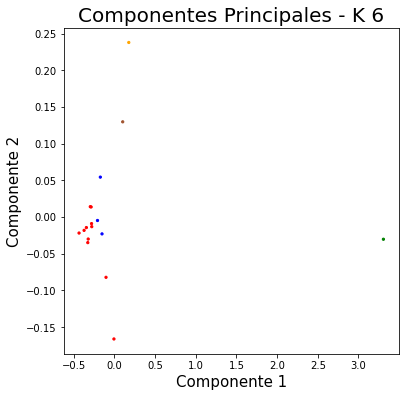

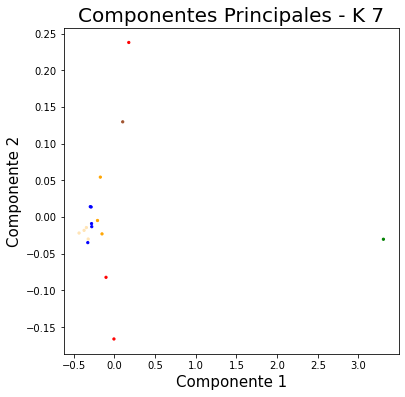

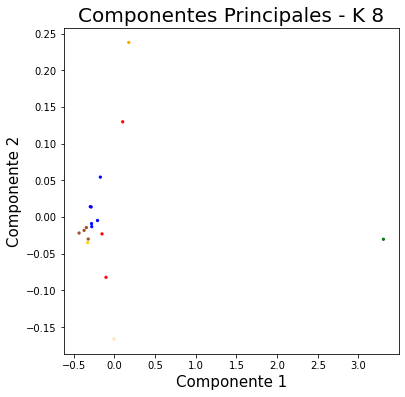

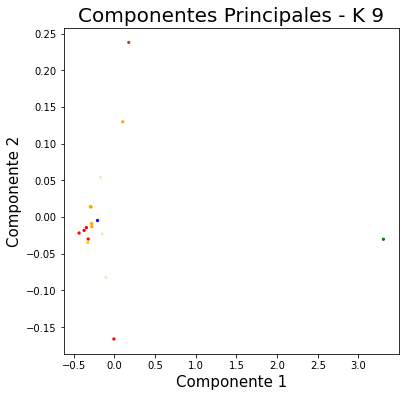

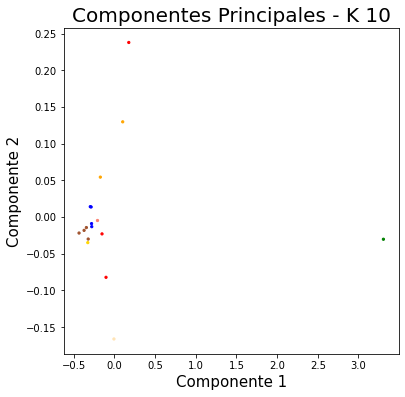

In [14]:
df_Covid_ciclo = df_Covid
for i in range(1,11):
  #Creamos el modelo y lo guardamos en clustering
  clustering_Ciclo = KMeans(n_clusters= i ,max_iter= 300)
  #aplicamos el modelo a la base de datos
  clustering_Ciclo.fit(df_Covid_norm)
  # Los resultado del clustering se guardan en labels_ dentro del modelo
  df_Covid_ciclo['Kmeans_Clustering'] = clustering_Ciclo.labels_
  #Aqui indicamos cuantos componentes principales queremos, por lo tanto si queremos un grafico de dos dimensiones, colocamos 2
  pca_Ciclo = PCA(n_components = 2)
  #Aqui obtenemos los dos componentes principales
  pca_Covid_Ciclo = pca.fit_transform(df_Covid_norm)
  #Convertimos los datos en dataframe
  pca_Covid_df_Ciclo = pd.DataFrame(data = pca_Covid_Ciclo, columns = ['Componente_1','Componente_2'])
  # a este dataframe le agregamos la columna Kmeans_Clustering, por lo tanto agregamos la columna con la funcion pd.concat
  pca_nombres_Covid_Ciclo = pd.concat([pca_Covid_df_Ciclo, df_Covid_ciclo[['Kmeans_Clustering']]], axis=1 )
  # le damos el tamaño a la figura
  fig = plt.figure(figsize=(6,6))
  #indicamos que solo agregaremos un grafico dentro de la figura
  ax = fig.add_subplot(1,1,1)
  #nombres de los ejes y titulo
  ax.set_xlabel('Componente 1' , fontsize =15)
  ax.set_ylabel('Componente 2' , fontsize =15)
  ax.set_title('Componentes Principales - K '+str(i), fontsize = 20)
  #Creamos un arreglo que contiene los colores
  color_theme = np.array(["blue","green","orange","red",    'red',        'sienna',     'moccasin',          'gold',
          'orange',   'salmon',    'chartreuse', 'green',      'mediumspringgreen', 'lightseagreen',
          'darkcyan', 'royalblue', 'blue',       'blueviolet', 'purple',            'fuchsia',
          'pink',     'tan',       'olivedrab',  'tomato',     'yellow',            'turquoise'])
  ax.scatter(x= pca_nombres_Covid_Ciclo.Componente_1, y = pca_nombres_Covid_Ciclo.Componente_2,
           c=color_theme[pca_nombres_Covid_Ciclo.Kmeans_Clustering],s=5)
  plt.show()

Obtenemos las Variables de forma individual viendo como se comporta el clustering

In [15]:
# Primero necesitamos agrupar los datos por meses
Variables_Cabecera = df_Covid.columns
Variables_Cabecera = Variables_Cabecera[1:17]

Graficamos las regiones y identificamos los puntos 

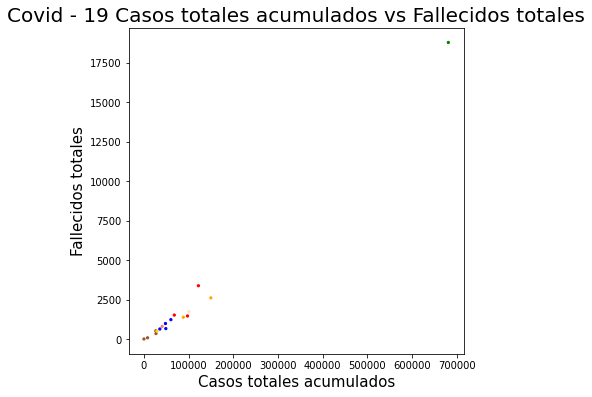

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


In [16]:
fig = plt.figure(figsize=(6,6))
for Variable in Variables_Cabecera:
  for Variable_2 in Variables_Cabecera:
    if Variable != Variable_2:
     
      #indicamos que solo agregaremos un grafico dentro de la figura
      ax = fig.add_subplot(1,1,1)
      ax.set_title('Covid - 19 '+Variable+' vs '+Variable_2, fontsize = 20)
      ax.set_xlabel( Variable, fontsize =15)
      ax.set_ylabel( Variable_2 , fontsize =15)
      #Creamos un arreglo que contiene los colores
      color_theme = np.array(["blue","green","orange","red",    'red',        'sienna',     'moccasin',          'gold',
          'orange',   'salmon',    'chartreuse', 'green',      'mediumspringgreen', 'lightseagreen',
          'darkcyan', 'royalblue', 'blue',       'blueviolet', 'purple',            'fuchsia',
          'pink',     'tan',       'olivedrab',  'tomato',     'yellow',            'turquoise'])
      ax.scatter(x= df_Covid[Variable] , y = df_Covid[Variable_2],
           c=color_theme[df_Covid['Kmeans_Clustering']],s=5)
      plt.show()

In [17]:
df_Covid

,Region,Casos totales acumulados,Fallecidos totales,Casos confirmados recuperados,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos probables acumulados,Casos activos probables,Casos nuevos totales,Casos nuevos con sintomas,Casos nuevos sin sintomas*,Casos nuevos reportados por laboratorio,Casos nuevos confirmados por antigeno,Casos activos confirmados,Kmeans_Clustering
0,Arica y Parinacota,26558,518,25933,1144,34,3257,16,9,4,5,0,0,71,5
1,Tarapacá,40813,799,39827,693,50,9572,109,21,13,6,2,6,159,9
2,Antofagasta,60344,1223,58963,727,42,6303,26,12,10,1,1,2,92,0
3,Atacama,26979,344,26546,851,34,1543,16,14,8,5,1,2,83,5
4,Coquimbo,48173,979,46981,509,28,8237,59,15,13,2,0,1,163,0
5,Valparaíso,121924,3373,117904,2518,73,47537,231,64,43,13,8,4,521,4
6,Metropolitana,681400,18782,658828,35167,853,147689,993,367,244,91,32,45,2548,1
7,O’Higgins,67935,1514,66190,1884,51,14083,47,40,30,10,0,5,183,3
8,Maule,100703,1743,98507,7907,65,10046,68,54,47,7,0,10,370,6
9,Ñuble,35664,631,34894,774,49,9608,40,18,14,4,0,0,116,0


Se utilizara otra metodologia y luego compararemos cual de las dos nos logra entregar un mayor valor para nuestro analisis

## Segunda Metodologia - Clustering - Jerarquico

### Usando la variable "Casos totales acumulados"

Base de datos del ministerio

URL: https://www.minciencia.gob.cl/covid19/

Importamos las librerias

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

%matplotlib inline

Importamos los datos que se enccuentra en la siguiente direccion:

URL Github : https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto4/2021-08-20-CasosConfirmados-totalRegional.csv
URL CSV: https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2021-08-20-CasosConfirmados-totalRegional.csv

In [19]:
# url = https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto4/2021-08-20-CasosConfirmados-totalRegional.csv
df_Covid = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2021-08-20-CasosConfirmados-totalRegional.csv', engine = 'python', index_col  = 0)


Vemos las caracteristicas de los datos

In [20]:
df_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Arica y Parinacota to Total
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Casos totales acumulados                 18 non-null     int64
 1   Fallecidos totales                       18 non-null     int64
 2   Casos confirmados recuperados            18 non-null     int64
 3   Casos confirmados por antigeno           18 non-null     int64
 4   Casos con sospecha de reinfeccion        18 non-null     int64
 5   Casos probables acumulados               18 non-null     int64
 6   Casos activos probables                  18 non-null     int64
 7   Casos nuevos totales                     18 non-null     int64
 8   Casos nuevos con sintomas                18 non-null     int64
 9   Casos nuevos sin sintomas*               18 non-null     int64
 10  Casos nuevos reportados por laboratorio  18 non-null     int6

Veremos las primeras filas de los datos para ver como son sus variables

In [21]:
df_Covid.head() 

,Casos totales acumulados,Fallecidos totales,Casos confirmados recuperados,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos probables acumulados,Casos activos probables,Casos nuevos totales,Casos nuevos con sintomas,Casos nuevos sin sintomas*,Casos nuevos reportados por laboratorio,Casos nuevos confirmados por antigeno,Casos activos confirmados
Region,,,,,,,,,,,,,
Arica y Parinacota,26558,518,25933,1144,34,3257,16,9,4,5,0,0,71
Tarapacá,40813,799,39827,693,50,9572,109,21,13,6,2,6,159
Antofagasta,60344,1223,58963,727,42,6303,26,12,10,1,1,2,92
Atacama,26979,344,26546,851,34,1543,16,14,8,5,1,2,83
Coquimbo,48173,979,46981,509,28,8237,59,15,13,2,0,1,163


In [22]:
#Quitamos la fila de los totales y seleccionamos la fila que queremos
#Tambien modificamos nuestro dataframe para utilizar las tres variables que insertaremos en el proceso
df_Covid  = df_Covid.iloc[:17,[0,1,12]]
#Aqui solo le pasamos la primera columna
Contagios = df_Covid.iloc[:17,[0]]
Contagios

,Casos totales acumulados
Region,
Arica y Parinacota,26558
Tarapacá,40813
Antofagasta,60344
Atacama,26979
Coquimbo,48173
Valparaíso,121924
Metropolitana,681400
O’Higgins,67935
Maule,100703


In [23]:
#Agrupamos los individuos segun su similitud, pasandoles las caracteristicas y le decimos que  utice el metodo ward
Clustering_Jerarquico = linkage(Contagios,'ward') # Utilizamos el metodo ward para agrupar los clusters

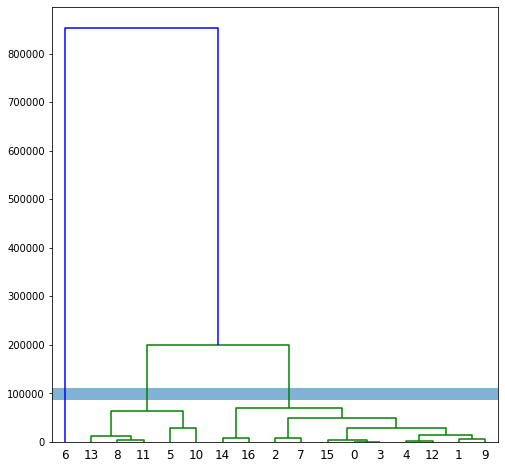

In [24]:
#realizamos la grafica del dendograma
plt.figure(figsize=(8,8))
dendrogram = sch.dendrogram(Clustering_Jerarquico)
plt.axhspan(85500,110500, alpha = 6000) 
plt.show()

In [25]:
clusters = fcluster(Clustering_Jerarquico, t=100000, criterion='distance') # t es la altura a la que haremos el corte de dendrograma, criterion es el criterio que utilizara para realizar el corte

In [26]:
# Veremos la cantidad de cluster que genero
clusters

array([2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2], dtype=int32)

In [27]:
df_Covid['CJ_CasosTotalesAcumulados'] = clusters #Equivale a la variable Casos totales acumulados
df_Covid.sort_values(['Casos totales acumulados'])

,Casos totales acumulados,Fallecidos totales,Casos activos confirmados,CJ_CasosTotalesAcumulados
Region,,,,
Se desconoce región de origen,52,0,0,2
Aysén,8132,74,44,2
Arica y Parinacota,26558,518,71,2
Atacama,26979,344,83,2
Magallanes,29221,494,43,2
Ñuble,35664,631,116,2
Tarapacá,40813,799,159,2
Coquimbo,48173,979,163,2
Los Ríos,49037,656,128,2


### Usando la variable "Fallecidos totales"


Utillizaremos el mismo dataframe que uso en la variable anterior agregando el nuevo clustering 

Vemos las caracteristicas de los datos

In [28]:
df_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Arica y Parinacota to Se desconoce región de origen
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Casos totales acumulados   17 non-null     int64
 1   Fallecidos totales         17 non-null     int64
 2   Casos activos confirmados  17 non-null     int64
 3   CJ_CasosTotalesAcumulados  17 non-null     int32
dtypes: int32(1), int64(3)
memory usage: 612.0+ bytes


In [29]:
#Quitamos la fila de los totales y seleccionamos la fila que queremos
Contagios = df_Covid.iloc[:,[1]]
Contagios

,Fallecidos totales
Region,
Arica y Parinacota,518
Tarapacá,799
Antofagasta,1223
Atacama,344
Coquimbo,979
Valparaíso,3373
Metropolitana,18782
O’Higgins,1514
Maule,1743


In [30]:
#Agrupamos los individuos segun su similitud, pasandoles las caracteristicas y le decimos que  utice el metodo ward
Clustering_Jerarquico = linkage(Contagios,'ward') # Utilizamos el metodo ward para agrupar los clusters

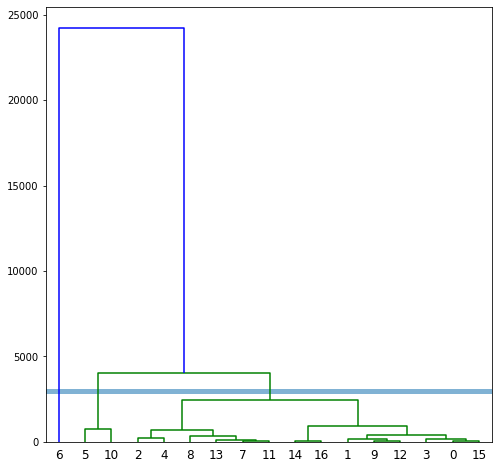

In [31]:
#realizamos la grafica del dendograma
plt.figure(figsize=(8,8))
dendrogram = sch.dendrogram(Clustering_Jerarquico)
plt.axhspan(2800,3100, alpha = 6000) 
plt.show()

In [32]:
clusters = fcluster(Clustering_Jerarquico, t=3000, criterion='distance') # t es la altura a la que haremos el corte de dendrograma, criterion es el criterio que utilizara para realizar el corte

In [33]:
# Veremos la cantidad de cluster que genero
clusters

array([2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

In [34]:
df_Covid['CJ_FallecidosTotales'] = clusters #Equivale a la variable Fallecidos totales
df_Covid.sort_values(['Fallecidos totales'])

,Casos totales acumulados,Fallecidos totales,Casos activos confirmados,CJ_CasosTotalesAcumulados,CJ_FallecidosTotales
Region,,,,,
Se desconoce región de origen,52,0,0,2,2
Aysén,8132,74,44,2,2
Atacama,26979,344,83,2,2
Magallanes,29221,494,43,2,2
Arica y Parinacota,26558,518,71,2,2
Ñuble,35664,631,116,2,2
Los Ríos,49037,656,128,2,2
Tarapacá,40813,799,159,2,2
Coquimbo,48173,979,163,2,2


### Usando la variable "Casos activos confirmados"

Utillizaremos el mismo dataframe que uso en la variable anterior agregando el nuevo clustering 

Vemos las caracteristicas de los datos

In [35]:
df_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Arica y Parinacota to Se desconoce región de origen
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Casos totales acumulados   17 non-null     int64
 1   Fallecidos totales         17 non-null     int64
 2   Casos activos confirmados  17 non-null     int64
 3   CJ_CasosTotalesAcumulados  17 non-null     int32
 4   CJ_FallecidosTotales       17 non-null     int32
dtypes: int32(2), int64(3)
memory usage: 680.0+ bytes


In [36]:
#Quitamos la fila de los totales y seleccionamos la fila que queremos
Contagios = df_Covid.iloc[:,[2]]
Contagios

,Casos activos confirmados
Region,
Arica y Parinacota,71
Tarapacá,159
Antofagasta,92
Atacama,83
Coquimbo,163
Valparaíso,521
Metropolitana,2548
O’Higgins,183
Maule,370


In [37]:
#Agrupamos los individuos segun su similitud, pasandoles las caracteristicas y le decimos que  utice el metodo ward
Clustering_Jerarquico = linkage(Contagios,'ward') # Utilizamos el metodo ward para agrupar los clusters

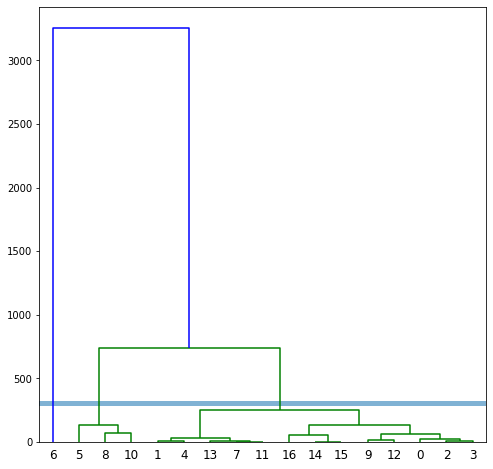

In [38]:
#realizamos la grafica del dendograma
plt.figure(figsize=(8,8))
dendrogram = sch.dendrogram(Clustering_Jerarquico)
plt.axhspan(280,320, alpha = 6000) 
plt.show()

In [39]:
clusters = fcluster(Clustering_Jerarquico, t=300, criterion='distance') # t es la altura a la que haremos el corte de dendrograma, criterion es el criterio que utilizara para realizar el corte

In [40]:
# Veremos la cantidad de cluster que genero
clusters

array([2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

In [41]:
df_Covid['CJ_CasosActivosConfirmados'] = clusters #Equivale a la variable Casos activos confirmados
df_Covid.sort_values(['Casos totales acumulados','Fallecidos totales','Casos activos confirmados'])

,Casos totales acumulados,Fallecidos totales,Casos activos confirmados,CJ_CasosTotalesAcumulados,CJ_FallecidosTotales,CJ_CasosActivosConfirmados
Region,,,,,,
Se desconoce región de origen,52,0,0,2,2,2
Aysén,8132,74,44,2,2,2
Arica y Parinacota,26558,518,71,2,2,2
Atacama,26979,344,83,2,2,2
Magallanes,29221,494,43,2,2,2
Ñuble,35664,631,116,2,2,2
Tarapacá,40813,799,159,2,2,2
Coquimbo,48173,979,163,2,2,2
Los Ríos,49037,656,128,2,2,2


### Graficamos los clusters Jerarquico, usando el mapa de chile

Importamos los archivos

In [ ]:
drive.mount('/content/drive')
shapefile = gpd.read_file('/content/drive/MyDrive/Diplomado-Data_Science/Machine Learning 1 /Trabajo/Regional.shp')

Cambiamos el codigo de la region que tiene asignada la variable "shapefile" ,agregando el valor 16 para que quede al final del dataframe 

In [ ]:
#cambiamos los valores de la Zona sin demarcar
shapefile.loc[shapefile['cir_sena'] == 0,'cir_sena']=16
shapefile = shapefile.sort_values(['cir_sena'])

Agregamos los clustering al dataframe

In [ ]:
#agregamos el clustering
shapefile['CJ_CasosTotalesAcumulados']  = df_Covid['CJ_CasosTotalesAcumulados'].values
shapefile['CJ_FallecidosTotales']       = df_Covid['CJ_FallecidosTotales'].values
shapefile['CJ_CasosActivosConfirmados'] = df_Covid['CJ_CasosActivosConfirmados'].values
Label = np.array(["Alto","Bajo","Medio"])

 
#shapefile

Se grafican las agrupaciones que realizo el modelo con respecto a la variable "Casos Totales Acumulados"


*   El valor Agrupado 1 : Cantidad de casos totales acumulados Medio
*   El valor Agrupado 2 : Cantidad de casos totales acumulados Bajo
*   El valor Agrupado 3 : Cantidad de casos totales acumulados Alto



In [ ]:
fig, ax = plt.subplots(figsize = (20,12))

shapefile.plot(ax=ax,
               cmap='OrRd',
               column ='CJ_CasosTotalesAcumulados' ,               
               linewidth=0.15,
               legend=True,
               edgecolor='black')
ax.set_title('Casos Totales Acumulados', loc = "center", fontdict = {'fontsize':16, 'fontweight':'bold'})
ax.set_xlim(-9000000,-7000000)

ax.set_axis_off()

Se grafican las agrupaciones que realizo el modelo con respecto a la variable "Fallecidos Totales"


*   El valor Agrupado 1 : Cantidad de fallecidos Medio
*   El valor Agrupado 2 : Cantidad de fallecidos Bajo
*   El valor Agrupado 3 : Cantidad de fallecidos Alto

In [ ]:
fig, ax = plt.subplots(figsize = (20,12))
shapefile.plot(ax=ax,
               cmap='OrRd',
               column ='CJ_FallecidosTotales',
               linewidth=0.15,
               legend=True,
               edgecolor='black',
               label = 'Alto'
               )
ax.set_title('Fallecidos Totales', loc = "center", fontdict = {'fontsize':16, 'fontweight':'bold'})
ax.set_xlim(-9000000,-7000000)
ax.set_axis_off()

Se grafican las agrupaciones que realizo el modelo con respecto a la variable "Casos Activos Confirmados"



*   El valor Agrupado 1 : Cantidad de casos activos Medio
*   El valor Agrupado 2 : Cantidad de casos activos Bajo
*   El valor Agrupado 3 : Cantidad de casos activos Alto



In [ ]:
fig, ax = plt.subplots(figsize = (20,12))
shapefile.plot(ax=ax,
               cmap='OrRd',
               column ='CJ_CasosActivosConfirmados',
               linewidth=0.15,
               legend=True,
               edgecolor='black',
               label = 'Alto'
               )
ax.set_title('Casos Activos Confirmados', loc = "center", fontdict = {'fontsize':16, 'fontweight':'bold'})
ax.set_xlim(-9000000,-7000000)
ax.set_axis_off()

## Aplicando la metodologia de SVM

In [ ]:
#uestas muestas
x , y = df_Covid[['Casos totales acumulados','CJ_CasosTotalesAcumulados']]

In [ ]:
#Creamos el modelo de SVM
clf = svm.SVC(kernel = 'linear', C=100)

In [ ]:
#Convertimos nuestras columnas de dataframe a arreglo con numpy
X=df_Covid[['Casos activos confirmados','Fallecidos totales']].to_numpy()
y=df_Covid[['CJ_CasosActivosConfirmados']].to_numpy()

In [ ]:
#entrenamos nuestro modelo 
clf.fit(X,y)

In [ ]:
#Graficamos los datos en el espacio de caracteristicas
cmap = matplotlib.colors.ListedColormap(['r','g'])
plt.scatter(X[:,0],X[:,1],c=y, s=40, cmap=cmap)

In [ ]:
#Validamos nuestro modelo
y_pred = clf.predict([[71,518]])
y_pred

Importamos fecha de otro mes

In [ ]:
df_Covid_20200629 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2020-06-29-CasosConfirmados-totalRegional.csv', engine = 'python', index_col  = 0)
df_Covid_20200629  = df_Covid_20200629.fillna(0)
df_Covid_20200629  = df_Covid_20200629.iloc[:17,[1,5,6]]
X_test=df_Covid_20200629[['Casos activos confirmados','Fallecidos totales']].to_numpy()
df_Covid_20200629

In [ ]:
#Validamos nuestro modelo
y_pred = clf.predict(X_test)
y_pred

Con esto concluimos que el modelo esta cumpliendo su funcion